#A Computer Vision Example
Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

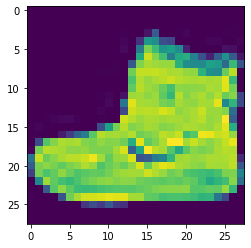

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping.

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4989 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3756 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3385 - accuracy: 0.8761
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3127 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2960 - accuracy: 0.8906


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3513 - accuracy: 0.8722


[0.35125210881233215, 0.8722000122070312]

# Exploration Exercises

For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])

[2.1235669e-06 1.4309683e-06 2.6717846e-06 5.3476043e-08 4.7915005e-06 2.5642207e-02 3.0428064e-06 5.1150642e-02 1.1026843e-04 9.2308277e-01]


In [ ]:
print(test_labels[0])

9


Let's now look at the layers in our model. Experiment with different values for the dense layer with 512 neurons. What different results do we get for loss, training time etc

###Increase to 1024 Neurons -- What's the impact?
Training takes longer, but is more accurate, by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.3.0
11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1830
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0750
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0490
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0338
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0760
[5.0156327e-11 7.7476133e-12 4.7715326e-10 3.1105344e-07 4.2158028e-15 1.7598702e-11 1.9652325e-15 9.9999714e-01 5.3069386e-11 2.4506694e-06]
7


#Excercise


Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers), extra layers are often necessary. 

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1857
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0784
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0546
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0420
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0868
[1.0960469e-11 1.4092211e-06 1.3698497e-07 2.7548929e-06 2.2728225e-08 1.6410002e-09 5.8304169e-12 9.9998915e-01 2.6015627e-08 6.5086697e-06]
7


#Exercise 

Consider the impact of training for more or less epochs.

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5 Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.3.0
Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2575
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1130
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0793
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0585
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0460
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0365
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0290
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0232
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0201
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0157
Epoch 11/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0143
Epoch 12/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.

#Exercise  

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that?

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1999
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0796
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0518
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0364
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0686
[4.0429551e-08 3.3379646e-09 6.1513134e-07 9.1853144e-06 4.9982258e-11 5.9897025e-09 2.8009910e-12 9.9998438e-01 7.1241665e-08 5.7915699e-06]
7
